In [6]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths
import pickle
from keras.models import load_model

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [7]:
emotion_model_path = 'fer2013_big_XCEPTION.54-0.66.hdf5'
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"

genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"

ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

emotion_labels = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'sad',5:'surprise',6:'neutral'}


detector = dlib.get_frontal_face_detector()
emotion_classifier = load_model(emotion_model_path, compile=False)
ageNet = cv2.dnn.readNet(ageModel, ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)

emotion_target_size = emotion_classifier.input_shape[1:3]

In [8]:
def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

Detection 0: Left: 166 Top: 106 Right: 701 Bottom: 641
Gender : Female, conf = 1.000


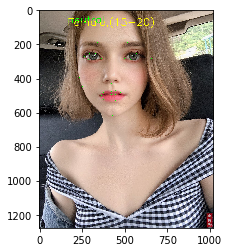

In [15]:
frame = cv2.imread("chloe2.png")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 370 Top: 302 Right: 680 Bottom: 611
Gender : Female, conf = 0.998


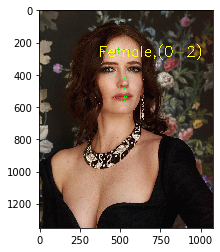

In [18]:
frame = cv2.imread("eva_test.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 255), 3, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 145 Top: 95 Right: 294 Bottom: 244
Gender : Male, conf = 1.000


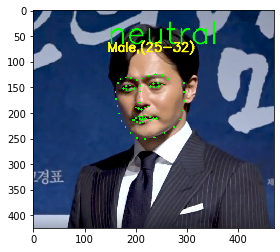

In [14]:
frame = cv2.imread("dong_test.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 62 Top: 95 Right: 211 Bottom: 244
Gender : Female, conf = 0.928


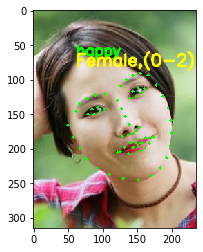

In [19]:
frame = cv2.imread("iu_test.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 267 Top: 164 Right: 577 Bottom: 474
Gender : Female, conf = 0.969


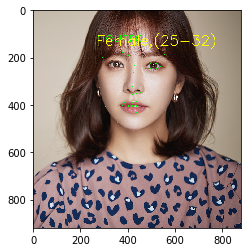

In [21]:
frame = cv2.imread("jimin_test.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 154 Top: 94 Right: 333 Bottom: 273
Gender : Female, conf = 0.918


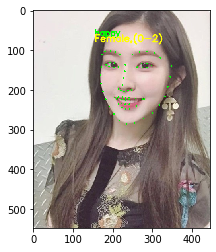

In [22]:
frame = cv2.imread("irin_test.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 246 Top: 112 Right: 333 Bottom: 198
Gender : Male, conf = 0.982


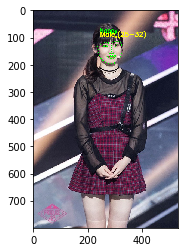

In [23]:
frame = cv2.imread("nanami_test.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 93 Top: 93 Right: 217 Bottom: 217
Gender : Female, conf = 0.985


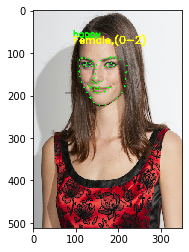

In [24]:
frame = cv2.imread("kaya_test.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 112 Top: 78 Right: 261 Bottom: 228
Gender : Male, conf = 1.000


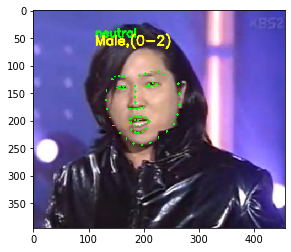

In [25]:
frame = cv2.imread("don_test.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)      
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        
        
        
imshow('', frame)

Detection 0: Left: 641 Top: 225 Right: 1176 Bottom: 760
emotion : neutral
Gender : Female, conf = 0.981


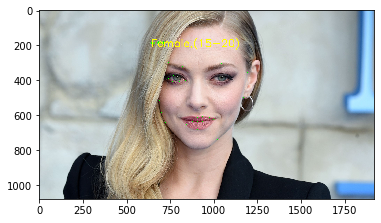

In [28]:
frame = cv2.imread("AmandaSeyfried.png")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        
        gray_face = gray[y1:y2, x1:x2]
        gray_face = cv2.resize(gray_face, (emotion_target_size))
        gray_face = preprocess_input(gray_face, True)
        gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
        gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가
    
        emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
        emotion_text = emotion_labels[emotion_label_arg]
        
        cv2.putText(frame, emotion_text, (x1, y1 -30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
        print("emotion : {}".format(emotion_text))
        
        
        face = frame[y1:y2, x1:x2, :]        
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv2.putText(frame, label, (x1, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 255), 4, cv2.LINE_AA)        
        
        
imshow('', frame)

In [41]:
def face_analyser(frame):
    frame = cv2.imread(frame)
    frame = cv2.resize(frame, (480, 480))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)  

    for k, d in enumerate(rects):
            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                k, d.left(), d.top(), d.right(), d.bottom()))
            shape = predictor(gray, d)
            shape = face_utils.shape_to_np(shape)
            for s in shape:
              cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)

            x1 = d.left()
            y1 = d.top()
            x2 = d.right()
            y2 = d.bottom()

            gray_face = gray[y1:y2, x1:x2]
            gray_face = cv2.resize(gray_face, (emotion_target_size))
            gray_face = preprocess_input(gray_face, True)
            gray_face = np.expand_dims(gray_face, 0) # 앞에 1차원 추가    
            gray_face = np.expand_dims(gray_face, -1) # 뒤에 1차원 추가

            emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
            emotion_text = emotion_labels[emotion_label_arg]

            cv2.putText(frame, emotion_text, (x1, y1 +5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
            print("emotion : {}".format(emotion_text))


            face = frame[y1:y2, x1:x2, :]        
            blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
            genderNet.setInput(blob)
            genderPreds = genderNet.forward()
            gender = genderList[genderPreds[0].argmax()]
            print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

            ageNet.setInput(blob)
            agePreds = ageNet.forward()
            age = ageList[agePreds[0].argmax()]

            label = "{},{}".format(gender, age)
            cv2.putText(frame, label, (x1, y1+30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)        


    imshow('', frame)

Detection 0: Left: 90 Top: 42 Right: 305 Bottom: 257
emotion : neutral
Gender : Female, conf = 1.000


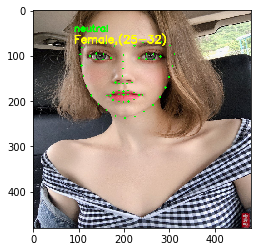

In [42]:
analysis_target = 'chloe2.png'
face_analyser(analysis_target)